In [1]:
#import packages
import pandas as pd
import numpy as np
from pandas import read_csv
import unicodedata
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix    
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.metrics import classification_report,confusion_matrix
from scipy import stats


C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
#load data
data = pd.read_csv("Data_Covid.csv")
data


,Horodateur,Est-ce que vous êtes étudiant(e),1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [Je me sens plus nerveux et anxieux que d'habitude(أشعر بالتوتر والقلق أكثر من المعتاد)],1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [J'ai peur sans aucune raison(خائف بلا سبب)],1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [Je m'énerve facilement ou je panique],1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [(أشعر بالرغبة في الإنهيار) J'ai l'impression de m'effondrer ],1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [Je sens que tout va bien et qu'il ne se passera rien de mal(أشعر أن كل شيء على ما يرام ولن يحدث شيء سيء)],1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [Mes bras et mes jambes tremblent],1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [Je suis gêné par un mal de tête et de dos(منزعج من الصداع وآلام الظهر)],1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [Je me sens faible et je me fatigue facilement.],...,1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [Mes mains sont généralement sèches et chaudes],1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [Mon visage devient chaud et rougit],1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [Je m'endors facilement et je me repose toute nuit(أنام ​​بسهولة وأرتاح طوال الليل)],1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [J'ai des cauchemars],Sexe,Établissement actuel,Année d'étude,Résidence pendant les études,Age,"En tant qu'étudiant, quels sont vos soucis et inquiétudes? exprimez-vous"
0,28/03/2022 23:59:05,Oui,Parfois,Souvent,Parfois,Très souvent,Rarement,Parfois,Très souvent,Très souvent,...,Rarement,Souvent,Rarement,Rarement,Femme,Ecole d’ingénieur,2ème année,Seul(e),20-22,NaN
1,28/03/2022 23:59:36,Oui,Très souvent,Très souvent,Très souvent,Très souvent,Rarement,Très souvent,Très souvent,Très souvent,...,Rarement,Parfois,Rarement,Très souvent,Femme,Ecole d’ingénieur,4ème année,Avec famille,20-22,"Avenir ,"
2,29/03/2022 00:00:02,Oui,Parfois,Rarement,Parfois,Parfois,Très souvent,Rarement,Parfois,Parfois,...,Rarement,Rarement,Parfois,Rarement,Homme,Ecole d’ingénieur,3ème année,Seul(e),20-22,est ce que la vie restera toujours comme ca av...
3,29/03/2022 00:01:52,Oui,Rarement,Rarement,Rarement,Rarement,Parfois,Rarement,Rarement,Rarement,...,Rarement,Rarement,Très souvent,Rarement,Femme,Ecole d’ingénieur,3ème année,Seul(e),20-22,NaN
4,29/03/2022 00:02:38,Oui,Rarement,Parfois,Très souvent,Rarement,Parfois,Souvent,Parfois,Rarement,...,Parfois,Rarement,Parfois,Parfois,Femme,Ecole d’ingénieur,3ème année,Seul(e),20-22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,20/04/2022 21:28:46,Oui,Rarement,Rarement,Rarement,Rarement,Très souvent,Rarement,Souvent,Souvent,...,Souvent,Souvent,Parfois,Rarement,Homme,Faculté des sciences,5ème année,Seul(e),22-24,NaN
714,20/04/2022 22:59:15,Oui,Très souvent,Très souvent,Très souvent,Très souvent,Rarement,Très souvent,Très souvent,Très souvent,...,Très souvent,Très souvent,Rarement,Souvent,Femme,Facultés des sciences et techniques,1ère années,Seul(e),18-20,NaN
715,20/04/2022 22:59:56,Oui,Parfois,Parfois,Très souvent,Rarement,Parfois,Parfois,Très souvent,Très souvent,...,Parfois,Parfois,Parfois,Parfois,Femme,Ecole d’ingénieur,3ème année,Avec famille,22-24,NaN
716,20/04/2022 23:43:03,Oui,Parfois,Parfois,Rarement,Rarement,Rarement,Rarement,Rarement,Rarement,...,Rarement,Rarement,Souvent,Rarement,Homme,Faculté des sciences économiques juridiques et...,2ème année,Avec famille,18-20,NaN


In [3]:
#nombre des reponses ('oui' et 'non')
data['Est-ce que vous êtes étudiant(e)'].value_counts()

Oui    707
Non     11
Name: Est-ce que vous êtes étudiant(e), dtype: int64

In [4]:
#suppression des reponses non
data.drop(data[ (data['Est-ce que vous êtes étudiant(e)'] == 'Non')] .index , inplace=True)
#suppression des colonnes : date, question et qst ouverte
data.drop(["Horodateur","Est-ce que vous êtes étudiant(e)","En tant qu'étudiant, quels sont vos soucis et inquiétudes? exprimez-vous"], axis = 1, inplace = True)   
data

,1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [Je me sens plus nerveux et anxieux que d'habitude(أشعر بالتوتر والقلق أكثر من المعتاد)],1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [J'ai peur sans aucune raison(خائف بلا سبب)],1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [Je m'énerve facilement ou je panique],1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [(أشعر بالرغبة في الإنهيار) J'ai l'impression de m'effondrer ],1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [Je sens que tout va bien et qu'il ne se passera rien de mal(أشعر أن كل شيء على ما يرام ولن يحدث شيء سيء)],1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [Mes bras et mes jambes tremblent],1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [Je suis gêné par un mal de tête et de dos(منزعج من الصداع وآلام الظهر)],1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [Je me sens faible et je me fatigue facilement.],1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [Je me sens calme et je peux rester assis sans bouger],1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [Je peux sentir mon cœur battre plus vite],...,1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [Je dois souvent vider ma vessie. (aller à la toilette pour uriner)],1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [Mes mains sont généralement sèches et chaudes],1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [Mon visage devient chaud et rougit],1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [Je m'endors facilement et je me repose toute nuit(أنام ​​بسهولة وأرتاح طوال الليل)],1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [J'ai des cauchemars],Sexe,Établissement actuel,Année d'étude,Résidence pendant les études,Age
0,Parfois,Souvent,Parfois,Très souvent,Rarement,Parfois,Très souvent,Très souvent,Parfois,Très souvent,...,Rarement,Rarement,Souvent,Rarement,Rarement,Femme,Ecole d’ingénieur,2ème année,Seul(e),20-22
1,Très souvent,Très souvent,Très souvent,Très souvent,Rarement,Très souvent,Très souvent,Très souvent,Très souvent,Très souvent,...,Rarement,Rarement,Parfois,Rarement,Très souvent,Femme,Ecole d’ingénieur,4ème année,Avec famille,20-22
2,Parfois,Rarement,Parfois,Parfois,Très souvent,Rarement,Parfois,Parfois,Rarement,Rarement,...,Parfois,Rarement,Rarement,Parfois,Rarement,Homme,Ecole d’ingénieur,3ème année,Seul(e),20-22
3,Rarement,Rarement,Rarement,Rarement,Parfois,Rarement,Rarement,Rarement,Parfois,Rarement,...,Rarement,Rarement,Rarement,Très souvent,Rarement,Femme,Ecole d’ingénieur,3ème année,Seul(e),20-22
4,Rarement,Parfois,Très souvent,Rarement,Parfois,Souvent,Parfois,Rarement,Très souvent,Souvent,...,Rarement,Parfois,Rarement,Parfois,Parfois,Femme,Ecole d’ingénieur,3ème année,Seul(e),20-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,Rarement,Rarement,Rarement,Rarement,Très souvent,Rarement,Souvent,Souvent,Très souvent,Rarement,...,Parfois,Souvent,Souvent,Parfois,Rarement,Homme,Faculté des sciences,5ème année,Seul(e),22-24
714,Très souvent,Très souvent,Très souvent,Très souvent,Rarement,Très souvent,Très souvent,Très souvent,Parfois,Très souvent,...,Très souvent,Très souvent,Très souvent,Rarement,Souvent,Femme,Facultés des sciences et techniques,1ère années,Seul(e),18-20
715,Parfois,Parfois,Très souvent,Rarement,Parfois,Parfois,Très souvent,Très souvent,Rarement,Parfois,...,Rarement,Parfois,Parfois,Parfois,Parfois,Femme,Ecole d’ingénieur,3ème année,Avec famille,22-24
716,Parfois,Parfois,Rarement,Rarement,Rarement,Rarement,Rarement,Rarement,Rarement,Rarement,...,Rarement,Rarement,Rarement,Souvent,Rarement,Homme,Faculté des sciences économiques juridiques et...,2ème année,Avec famille,18-20


In [5]:
data.columns = ["Q1","Q2","Q3","Q4","Q5","Q6","Q7","Q8","Q9","Q10","Q11","Q12","Q13", "Q14","Q15","Q16","Q17","Q18","Q19","Q20","sexe","etablissement","annee","residence","age"]
data

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q16,Q17,Q18,Q19,Q20,sexe,etablissement,annee,residence,age
0,Parfois,Souvent,Parfois,Très souvent,Rarement,Parfois,Très souvent,Très souvent,Parfois,Très souvent,...,Rarement,Rarement,Souvent,Rarement,Rarement,Femme,Ecole d’ingénieur,2ème année,Seul(e),20-22
1,Très souvent,Très souvent,Très souvent,Très souvent,Rarement,Très souvent,Très souvent,Très souvent,Très souvent,Très souvent,...,Rarement,Rarement,Parfois,Rarement,Très souvent,Femme,Ecole d’ingénieur,4ème année,Avec famille,20-22
2,Parfois,Rarement,Parfois,Parfois,Très souvent,Rarement,Parfois,Parfois,Rarement,Rarement,...,Parfois,Rarement,Rarement,Parfois,Rarement,Homme,Ecole d’ingénieur,3ème année,Seul(e),20-22
3,Rarement,Rarement,Rarement,Rarement,Parfois,Rarement,Rarement,Rarement,Parfois,Rarement,...,Rarement,Rarement,Rarement,Très souvent,Rarement,Femme,Ecole d’ingénieur,3ème année,Seul(e),20-22
4,Rarement,Parfois,Très souvent,Rarement,Parfois,Souvent,Parfois,Rarement,Très souvent,Souvent,...,Rarement,Parfois,Rarement,Parfois,Parfois,Femme,Ecole d’ingénieur,3ème année,Seul(e),20-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,Rarement,Rarement,Rarement,Rarement,Très souvent,Rarement,Souvent,Souvent,Très souvent,Rarement,...,Parfois,Souvent,Souvent,Parfois,Rarement,Homme,Faculté des sciences,5ème année,Seul(e),22-24
714,Très souvent,Très souvent,Très souvent,Très souvent,Rarement,Très souvent,Très souvent,Très souvent,Parfois,Très souvent,...,Très souvent,Très souvent,Très souvent,Rarement,Souvent,Femme,Facultés des sciences et techniques,1ère années,Seul(e),18-20
715,Parfois,Parfois,Très souvent,Rarement,Parfois,Parfois,Très souvent,Très souvent,Rarement,Parfois,...,Rarement,Parfois,Parfois,Parfois,Parfois,Femme,Ecole d’ingénieur,3ème année,Avec famille,22-24
716,Parfois,Parfois,Rarement,Rarement,Rarement,Rarement,Rarement,Rarement,Rarement,Rarement,...,Rarement,Rarement,Rarement,Souvent,Rarement,Homme,Faculté des sciences économiques juridiques et...,2ème année,Avec famille,18-20


In [6]:
#remplacer par 1 2 3 4 
data[data == 'Rarement'] = 1
data[data == 'Parfois'] = 2
data[data == 'Souvent'] = 3
data[data == 'Très souvent'] = 4

In [7]:
dataset = data.values
anxiete = dataset[:,0:20]
anxiete

array([[2, 3, 2, ..., 3, 1, 1],
       [4, 4, 4, ..., 2, 1, 4],
       [2, 1, 2, ..., 1, 2, 1],
       ...,
       [2, 2, 4, ..., 2, 2, 2],
       [2, 2, 1, ..., 1, 3, 1],
       [1, 2, 2, ..., 1, 1, 1]], dtype=object)

In [8]:
#add score column 
score = 1.25*(anxiete.sum(axis=1))
data['score']=score

<AxesSubplot:xlabel='sexe', ylabel='score'>

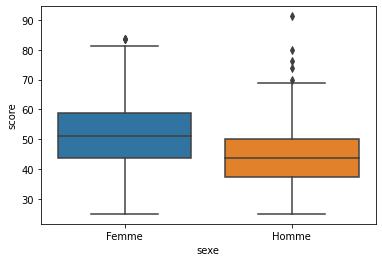

In [9]:
#boxplot
sns.boxplot(y='score',x='sexe', data=data)

In [10]:
#calcul du score
y = []
for score in score:
    if((score >= 25) and (score < 50)):
        score = "état normal"
    elif(score >= 50):
        score = "existence d'anxiété"
    y.append(score)


In [11]:
data['anxiete'] = y
data

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q18,Q19,Q20,sexe,etablissement,annee,residence,age,score,anxiete
0,2,3,2,4,1,2,4,4,2,4,...,3,1,1,Femme,Ecole d’ingénieur,2ème année,Seul(e),20-22,61.25,existence d'anxiété
1,4,4,4,4,1,4,4,4,4,4,...,2,1,4,Femme,Ecole d’ingénieur,4ème année,Avec famille,20-22,70.0,existence d'anxiété
2,2,1,2,2,4,1,2,2,1,1,...,1,2,1,Homme,Ecole d’ingénieur,3ème année,Seul(e),20-22,42.5,état normal
3,1,1,1,1,2,1,1,1,2,1,...,1,4,1,Femme,Ecole d’ingénieur,3ème année,Seul(e),20-22,35.0,état normal
4,1,2,4,1,2,3,2,1,4,3,...,1,2,2,Femme,Ecole d’ingénieur,3ème année,Seul(e),20-22,47.5,état normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,1,1,1,1,4,1,3,3,4,1,...,3,2,1,Homme,Faculté des sciences,5ème année,Seul(e),22-24,52.5,existence d'anxiété
714,4,4,4,4,1,4,4,4,2,4,...,4,1,3,Femme,Facultés des sciences et techniques,1ère années,Seul(e),18-20,80.0,existence d'anxiété
715,2,2,4,1,2,2,4,4,1,2,...,2,2,2,Femme,Ecole d’ingénieur,3ème année,Avec famille,22-24,56.25,existence d'anxiété
716,2,2,1,1,1,1,1,1,1,1,...,1,3,1,Homme,Faculté des sciences économiques juridiques et...,2ème année,Avec famille,18-20,36.25,état normal


In [12]:
#Etablissement
etablissement = dataset[:,21].tolist()


In [13]:
#suppression des espaces au debut et à la fin + normalisation : suppression des accents + majuscule 
for i in range(0,len(etablissement)):
    etablissement[i] = unicodedata.normalize('NFKD',str(etablissement[i]).lstrip().rstrip()).encode('ascii', 'ignore').upper()
    

In [14]:
#regroupement 

ing = [b"ECOLE DINGENIEUR",b"ENSAO",b"ENSA",b"APESA",b"ECOLE NATIONALE DES SCIENCES APPLIQUEES",b"ESTEM",b"ECOLE CENTRALE DE CASABLANCA",b"STAGE",b"UFC",b'UNIVERSITE PRIVEE DE FES',b'ISGA',b'ENSET',b'ECOLE NATIONALE SUPERIEURE']
commerce = [b"ECOLE DE COMMERCE ET DE GESTION",b"ENCG",b"ISCAE",b"PAS AU MAROC",b'ECOLE PRIVEE',b'ISITT']
fst = [b"FST",b"FACULTE DE SCIENCES ET TECHNIQUES",b"FACULTE DES SCIENCES ET TECHNIQUES",b"FACULTES DES SCIENCES ET TECHNIQUES",b'FSA']
fsejs = [b"FACULTE DES SCIENCES ECONOMIQUES JURIDIQUES ET SOCIALES",b"FACULTE DES SCIENCES ECONOMIQUES ET JURIDIQUE ET SOCIALE + ISHT",b"FACULTE D'ECONOMIE ET DE GESTION",b"FACULTE",b'ECOLE DE SCIENCE POLITIQUE EN FRANCE']
medec = {b"FACULTE DE MEDECINE ET DE PHARMACIE",b"FACULTE DE MEDECINE DENTAIRE", b"UIASS",b'UIR',b'UM6SS'}
cpge = [b"CLASSES PREPARATOIRES", b"CPGE"]
infermier = [b"ISPITS", b"KINESITHERAPIE", b"INSTITUT SUPERIEUR DES PROFESSIONS INFIRMIERES ET TECHNIQUES DE SANTE", b"ECOLE SUPERIEUR DE KINESITHERAPIE ET DU PARAMEDICAL"]
technicien = [b"INAU", b"INSTITUT NATIONALE D'AMENAGEMENT ET DURBANISME",b"INSTITUT NATIONALE DAMENAGEMENT ET DURBANISME",b'BTS',b'IFMEREE',b'OFPPT']
education = [b"ECOLE DU PROFESSORAT ET DE L'EDUCATION", b"ECOLE SUPERIEURE DEDUCATION ET DE FORMATION OUJDA", b"ECOLE NORMAL SUPERIEUR", b"ECOLE NORMALE SUPERIEURE", b"ESEF"]
fs = [b"ISTIC",b"FACULTE DES SCIENCES",b'PHD STUDENT',b'AL AKHAWAYN UNIVERSITY',b'FRANCE']
flsh = [b"L'INSTITUT NATIONAL DE L'ACTION SOCIALE",b"ISADAC",b"UEMF"]
est = [b'EST',b'ECOLE SUPERIEUR DE TECHNOLOGIE']

for i in range(0,len(etablissement)):
    if(etablissement[i] in ing):
        etablissement[i] = "ECOLE D'INGENIEUR"
    elif(etablissement[i] in commerce):
        etablissement[i] = "ECOLE DE COMMERCE ET DE GESTION"
    elif(etablissement[i] in fst):
        etablissement[i] = "FACULTE DES SCIENCES ET TECHNIQUES"
    elif(etablissement[i] in fsejs):
        etablissement[i] = "FACULTE DES SCIENCES ECONOMIQUES JURIDIQUES ET SOCIALES"
    elif(etablissement[i] in medec):
        etablissement[i] = "FACULTE DE MEDECINE"
    elif(etablissement[i] in cpge):
        etablissement[i] = "CLASSES PREPARATOIRES AUX GRANDES ECOLES"
    elif(etablissement[i] in infermier):
        etablissement[i] = "ETABLISSEMENT DE PROFESSIONS INFIRMIERES"
    elif(etablissement[i] in technicien):
        etablissement[i] = "INSTITUT TECHNICIENS SPECIALISES"
    elif(etablissement[i] in education):
        etablissement[i] = "ETABLISSEMENT DES METIERS D'EDUCATION"
    elif(etablissement[i] in fs):
        etablissement[i] = "FACULTE DES SCIENCES"
    elif(etablissement[i] in flsh):
        etablissement[i] = "FACULTE DES LETTRES ET DES SCIENCES HUMAINES"
    elif(etablissement[i] in est):
        etablissement[i] = "ECOLE SUPERIEURE DE TECHNOLOGIE"
    else:
        etablissement[i] = etablissement[i].decode("utf-8")

In [15]:
#new 'etablissement' column
data["etablissement"] = data["etablissement"].replace(dataset[:,21], etablissement)

In [16]:
#suppression des lyceens
liste=['2EME ANNEE LYCEENNE','2 ANNEE BACCALAUREAT','LYCEENS','LYCEE','LYCEEN','LYCEE LL',"LYCEE MANSOUR AL DAHBI M'DIQ",'BAC','LYCEE 2EME ANNEE BACCALAUREAT','1 ANNEE BACALAURIA','LYCEE','LYCEE', '  ','LYCEE YOUSSEF BEN TACHEFINE','BACHILLERATO DE HUAMIDADES SALUTACIONS FROM SPAIN','2EME BAC','LYCEE','LYCEE MOHAMMED 5','GROUPE SCOLAIRE ATLAS','LYCEE QUALIFIANT MAHDI ELMANDJRA','LESSIE']
data.drop(data[data['etablissement'].isin(liste)].index, inplace=True)
any(data['etablissement'].isin(liste))


False

In [17]:
data

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q18,Q19,Q20,sexe,etablissement,annee,residence,age,score,anxiete
0,2,3,2,4,1,2,4,4,2,4,...,3,1,1,Femme,ECOLE D'INGENIEUR,2ème année,Seul(e),20-22,61.25,existence d'anxiété
1,4,4,4,4,1,4,4,4,4,4,...,2,1,4,Femme,ECOLE D'INGENIEUR,4ème année,Avec famille,20-22,70.0,existence d'anxiété
2,2,1,2,2,4,1,2,2,1,1,...,1,2,1,Homme,ECOLE D'INGENIEUR,3ème année,Seul(e),20-22,42.5,état normal
3,1,1,1,1,2,1,1,1,2,1,...,1,4,1,Femme,ECOLE D'INGENIEUR,3ème année,Seul(e),20-22,35.0,état normal
4,1,2,4,1,2,3,2,1,4,3,...,1,2,2,Femme,ECOLE D'INGENIEUR,3ème année,Seul(e),20-22,47.5,état normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,1,1,1,1,4,1,3,3,4,1,...,3,2,1,Homme,FACULTE DES SCIENCES,5ème année,Seul(e),22-24,52.5,existence d'anxiété
714,4,4,4,4,1,4,4,4,2,4,...,4,1,3,Femme,FACULTE DES SCIENCES ET TECHNIQUES,1ère années,Seul(e),18-20,80.0,existence d'anxiété
715,2,2,4,1,2,2,4,4,1,2,...,2,2,2,Femme,ECOLE D'INGENIEUR,3ème année,Avec famille,22-24,56.25,existence d'anxiété
716,2,2,1,1,1,1,1,1,1,1,...,1,3,1,Homme,FACULTE DES SCIENCES ECONOMIQUES JURIDIQUES ET...,2ème année,Avec famille,18-20,36.25,état normal


C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


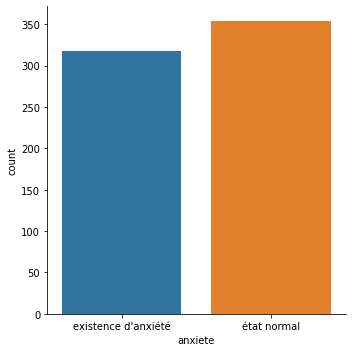

In [18]:
#visualisation d'anxiete
sns.catplot('anxiete', data=data, kind='count')

In [19]:
#nombre des etudiants de chaque etablissement
data['etablissement'].value_counts()

ECOLE D'INGENIEUR                                          284
FACULTE DES SCIENCES                                        73
FACULTE DES SCIENCES ECONOMIQUES JURIDIQUES ET SOCIALES     71
ECOLE DE COMMERCE ET DE GESTION                             58
ECOLE SUPERIEURE DE TECHNOLOGIE                             44
FACULTE DE MEDECINE                                         43
FACULTE DES LETTRES ET DES SCIENCES HUMAINES                25
CLASSES PREPARATOIRES AUX GRANDES ECOLES                    25
INSTITUT TECHNICIENS SPECIALISES                            22
FACULTE DES SCIENCES ET TECHNIQUES                          14
ETABLISSEMENT DE PROFESSIONS INFIRMIERES                     8
ETABLISSEMENT DES METIERS D'EDUCATION                        5
Name: etablissement, dtype: int64

In [20]:
#etablissement pie chart data (nombre des cas d'anxiete)
pie1 = data.mask(data['anxiete'].ne("existence d'anxiété")).groupby(['etablissement','anxiete']).size().sort_values(ascending=False)
pie1_norm = data.mask(data['anxiete'].ne("état normal")).groupby(['etablissement','anxiete']).size().sort_values(ascending=False)
pie1

etablissement                                            anxiete            
ECOLE D'INGENIEUR                                        existence d'anxiété    113
FACULTE DES SCIENCES ECONOMIQUES JURIDIQUES ET SOCIALES  existence d'anxiété     43
FACULTE DES SCIENCES                                     existence d'anxiété     38
ECOLE DE COMMERCE ET DE GESTION                          existence d'anxiété     35
ECOLE SUPERIEURE DE TECHNOLOGIE                          existence d'anxiété     23
CLASSES PREPARATOIRES AUX GRANDES ECOLES                 existence d'anxiété     15
FACULTE DE MEDECINE                                      existence d'anxiété     15
FACULTE DES LETTRES ET DES SCIENCES HUMAINES             existence d'anxiété     13
INSTITUT TECHNICIENS SPECIALISES                         existence d'anxiété     12
FACULTE DES SCIENCES ET TECHNIQUES                       existence d'anxiété      7
ETABLISSEMENT DES METIERS D'EDUCATION                    existence d'anxiété      3

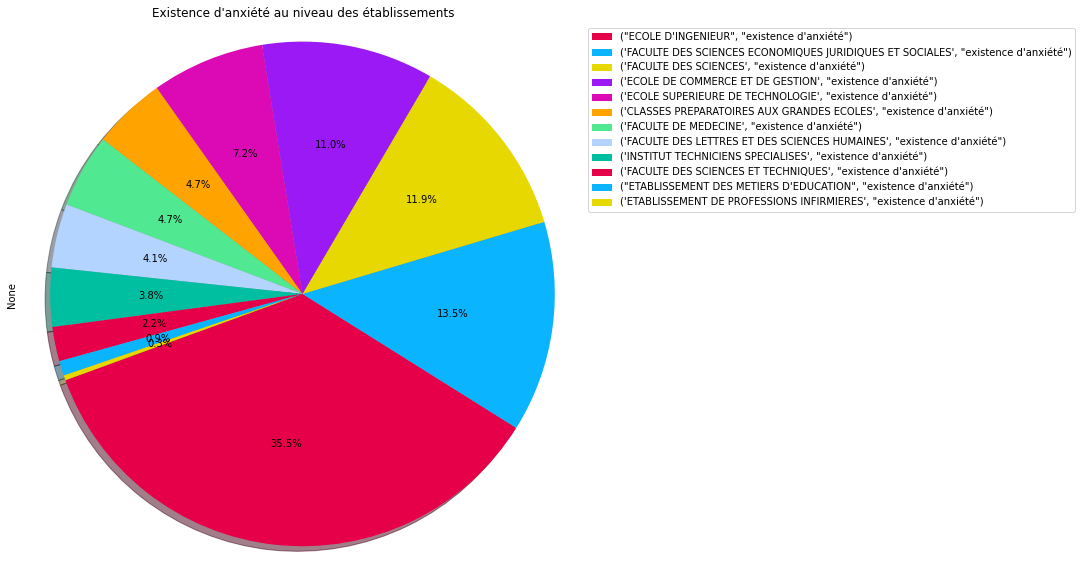

In [21]:
#etablissement plot pie chart

colors_list =["#e60049", "#0bb4ff", "#e6d800", "#9b19f5", "#dc0ab4",  "#ffa300","#50e991", "#b3d4ff", "#00bfa0"]
pie1.plot(kind='pie',
         figsize=(10, 10),
         autopct='%1.1f%%', 
         startangle=200,
         shadow=True,
         colors=colors_list,  # add custom colors
         labels=None)
plt.title("Existence d'anxiété au niveau des établissements") 

plt.axis('equal') 
plt.legend(labels=pie1.index ,bbox_to_anchor=(1, 1), loc='upper left') 

plt.show()

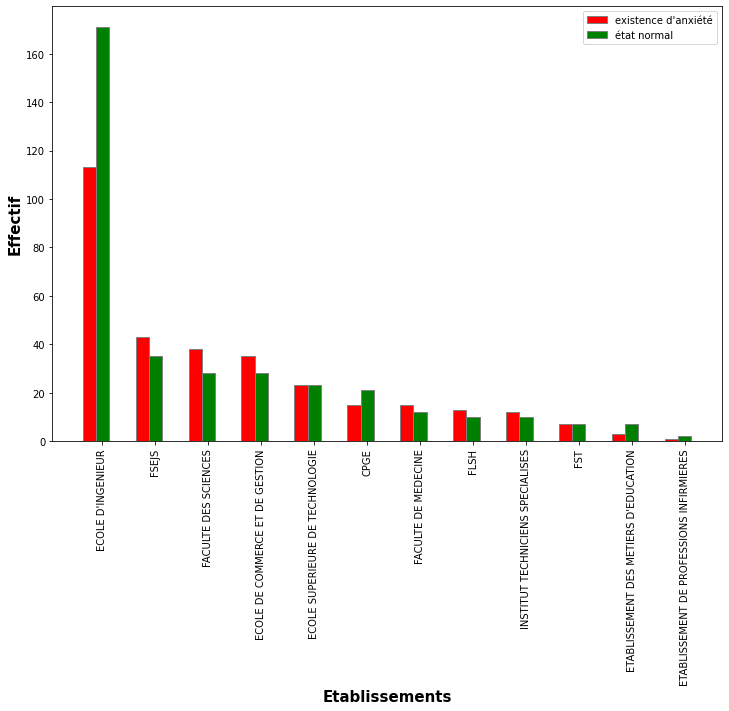

In [22]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
# Set position of bar on X axis
br1 = np.arange(len(data.etablissement.value_counts()))
br2 = [x + barWidth for x in br1]
# Make the plot
plt.bar(br1, pie1, color ='r', width = barWidth,
        edgecolor ='grey', label ="existence d'anxiété")
plt.bar(br2, pie1_norm, color ='g', width = barWidth,
        edgecolor ='grey', label ="état normal")
# Adding Xticks
plt.xlabel('Etablissements', fontweight ='bold', fontsize = 15)
plt.ylabel('Effectif', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(data.etablissement.value_counts()))],
        ["ECOLE D'INGENIEUR", "FSEJS", "FACULTE DES SCIENCES","ECOLE DE COMMERCE ET DE GESTION", "ECOLE SUPERIEURE DE TECHNOLOGIE",
         "CPGE","FACULTE DE MEDECINE","FLSH","INSTITUT TECHNICIENS SPECIALISES","FST",
        "ETABLISSEMENT DES METIERS D'EDUCATION","ETABLISSEMENT DE PROFESSIONS INFIRMIERES"],
          rotation=90)
 
plt.legend()
plt.savefig('multi bar etab.png',facecolor = 'white',dpi = 1000)
plt.show()

In [23]:
#annee pie chart data
pie2 = data.mask(data['anxiete'].ne("existence d'anxiété")).groupby(['annee','anxiete']).size().sort_values(ascending=False)
pie2_norm = data.mask(data['anxiete'].ne("état normal")).groupby(['annee','anxiete']).size().sort_values(ascending=False)
pie2

annee                                                      anxiete            
1ère années                                                existence d'anxiété    95
3ème année                                                 existence d'anxiété    83
2ème année                                                 existence d'anxiété    58
4ème année                                                 existence d'anxiété    48
5ème année                                                 existence d'anxiété    24
Doctorants                                                 existence d'anxiété     9
6ème année où 7ème année (pour les étudiants en médecine)  existence d'anxiété     1
dtype: int64

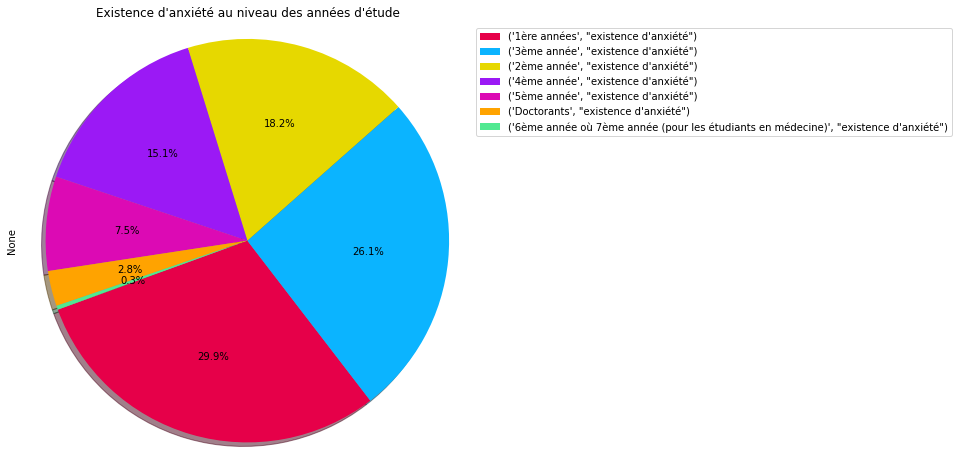

In [24]:
#annee plot pie chart
pie2.plot(kind='pie',
      figsize=(8, 8),
      autopct='%1.1f%%', 
      startangle=200,
      colors=colors_list,
      shadow=True,
      labels=None)
plt.title("Existence d'anxiété au niveau des années d'étude") 

plt.axis('equal') 
plt.legend(labels=pie2.index ,bbox_to_anchor=(1, 1), loc='upper left') 

plt.show()

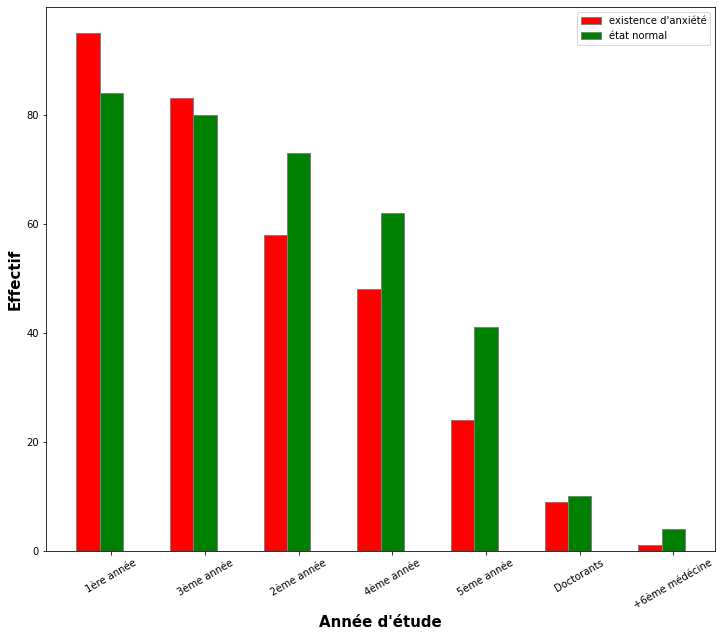

In [25]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 10))
# Set position of bar on X axis
br1 = np.arange(len(data.annee.value_counts()))
br2 = [x + barWidth for x in br1]
# Make the plot
plt.bar(br1, pie2, color ='r', width = barWidth,
        edgecolor ='grey', label ="existence d'anxiété")
plt.bar(br2, pie2_norm, color ='g', width = barWidth,
        edgecolor ='grey', label ="état normal")
# Adding Xticks
plt.xlabel("Année d'étude", fontweight ='bold', fontsize = 15)
plt.ylabel('Effectif', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(data.annee.value_counts()))],
        ["1ère année","3ème année","2ème année","4ème année","5ème année","Doctorants","+6ème médécine"],
          rotation=30)
 
plt.legend()

plt.savefig('multi bar annee.png',facecolor = 'white',dpi = 1000)
plt.show()

In [26]:
#age pie chart data
pie3 = data.mask(data['anxiete'].ne("existence d'anxiété")).groupby(['age','anxiete']).size().sort_values(ascending=False)
pie3_norm = data.mask(data['anxiete'].ne("état normal")).groupby(['age','anxiete']).size().sort_values(ascending=False)
pie3

age             anxiete            
20-22           existence d'anxiété    133
18-20           existence d'anxiété    132
22-24           existence d'anxiété     43
Supérieur à 24  existence d'anxiété     10
dtype: int64

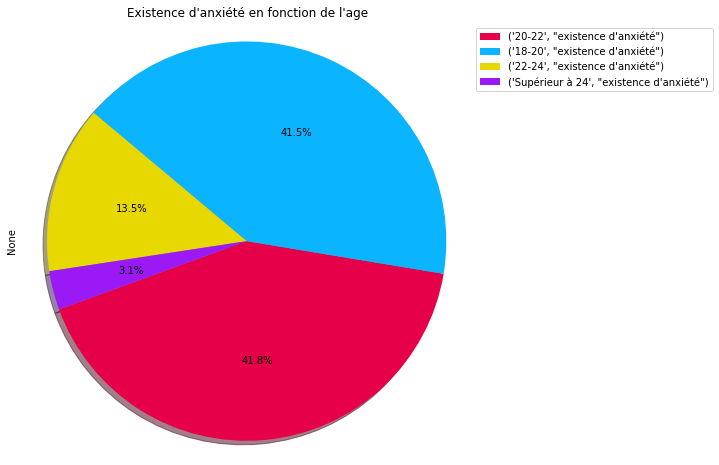

In [27]:
#age plot pie chart
pie3.plot(kind='pie',
      figsize=(8, 8),
      autopct='%1.1f%%', 
      startangle=200,     
      colors=colors_list,
      shadow=True,
      labels=None)
plt.title("Existence d'anxiété en fonction de l'age") 

plt.axis('equal') 
plt.legend(labels=pie3.index ,bbox_to_anchor=(1, 1), loc='upper left') 

plt.show()

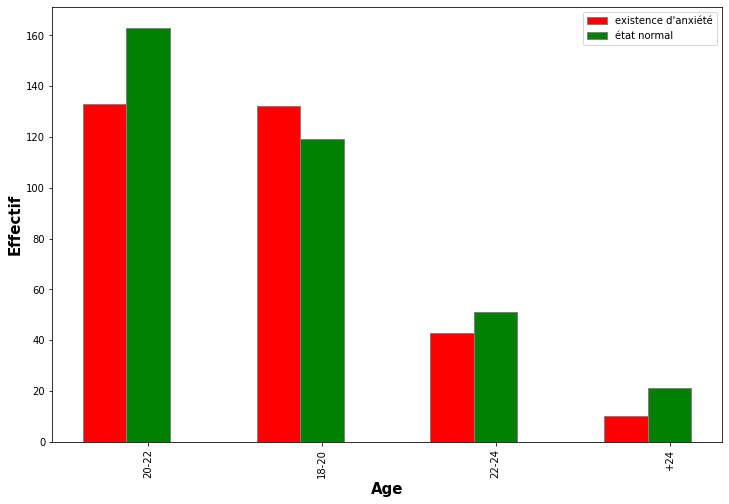

In [28]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
# Set position of bar on X axis
br1 = np.arange(len(data.age.value_counts()))
br2 = [x + barWidth for x in br1]
# Make the plot
plt.bar(br1, pie3, color ='r', width = barWidth,
        edgecolor ='grey', label ="existence d'anxiété")
plt.bar(br2, pie3_norm, color ='g', width = barWidth,
        edgecolor ='grey', label ="état normal")
# Adding Xticks
plt.xlabel('Age', fontweight ='bold', fontsize = 15)
plt.ylabel('Effectif', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(data.age.value_counts()))],
        ["20-22","18-20","22-24","+24"],
          rotation=90)
 
plt.legend()
plt.savefig('multi bar age.png',facecolor = 'white',dpi = 1000)
plt.show()

In [29]:
#sexe pie chart data
pie4 = data.mask(data['anxiete'].ne("existence d'anxiété")).groupby(['sexe','anxiete']).size().sort_values(ascending=False)
pie4

sexe   anxiete            
Femme  existence d'anxiété    268
Homme  existence d'anxiété     50
dtype: int64

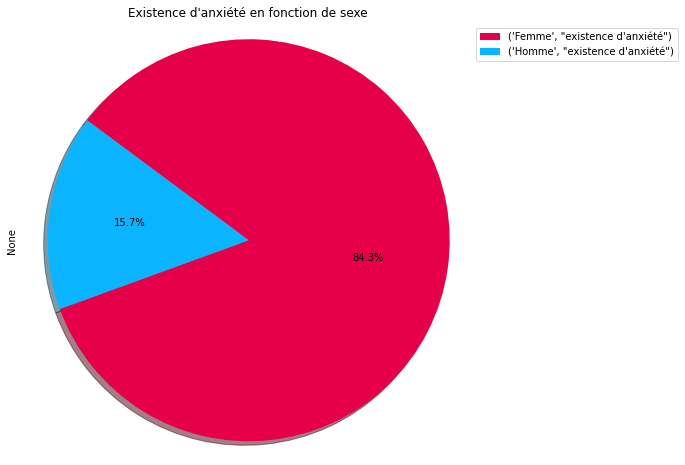

In [30]:
#sexe plot pie chart

pie4.plot(kind='pie',
      figsize=(8, 8),
      autopct='%1.1f%%', 
      startangle=200,     
      colors=colors_list,
      shadow=True,
      labels=None)
plt.title("Existence d'anxiété en fonction de sexe") 

plt.axis('equal') 
plt.legend(labels=pie4.index ,bbox_to_anchor=(1, 1), loc='upper left') 

plt.show()

In [31]:
#residence pie chart data
pie5 = data.mask(data['anxiete'].ne("existence d'anxiété")).groupby(['residence','anxiete']).size().sort_values(ascending=False)
pie5

residence     anxiete            
Seul(e)       existence d'anxiété    165
Avec famille  existence d'anxiété    153
dtype: int64

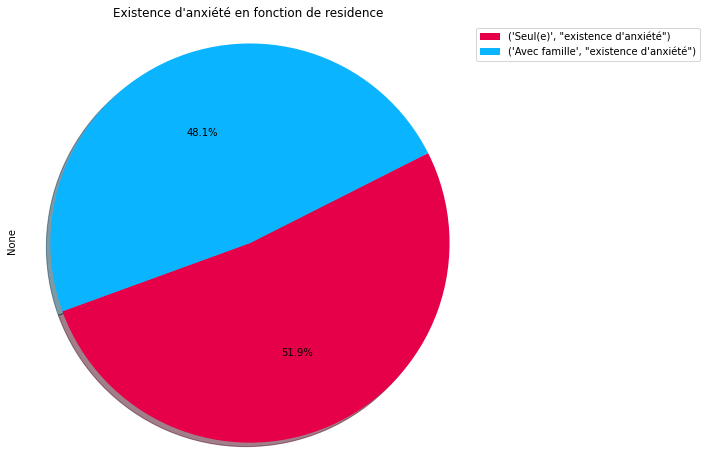

In [32]:
#sexe plot pie chart

pie5.plot(kind='pie',
      figsize=(8, 8),
      autopct='%1.1f%%', 
      startangle=200,     
      colors=colors_list,
      shadow=True,
      labels=None)
plt.title("Existence d'anxiété en fonction de residence") 

plt.axis('equal') 
plt.legend(labels=pie5.index ,bbox_to_anchor=(1, 1), loc='upper left') 

plt.show()

In [33]:
dataset = data.values
# split data into X and y
X = dataset[:,20:-2]
X = X.astype(str)
Y = dataset[:,-1]
X

array([['Femme', "ECOLE D'INGENIEUR", '2ème année', 'Seul(e)', '20-22'],
       ['Femme', "ECOLE D'INGENIEUR", '4ème année', 'Avec famille',
        '20-22'],
       ['Homme', "ECOLE D'INGENIEUR", '3ème année', 'Seul(e)', '20-22'],
       ...,
       ['Femme', "ECOLE D'INGENIEUR", '3ème année', 'Avec famille',
        '22-24'],
       ['Homme',
        'FACULTE DES SCIENCES ECONOMIQUES JURIDIQUES ET SOCIALES',
        '2ème année', 'Avec famille', '18-20'],
       ['Femme', "ECOLE D'INGENIEUR", '1ère années', 'Avec famille',
        '18-20']], dtype='<U57')

In [34]:
# encode string input values as integers
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X)
enc.categories_
encoded_x = pd.DataFrame(enc.transform(X).toarray())

In [35]:
# encode string class values as integers
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(Y)


In [36]:
# summarize class distribution
from collections import Counter
counter = Counter(Y)
print(counter)

Counter({'état normal': 354, "existence d'anxiété": 318})


In [37]:
#model training and results
X_train, X_test, y_train, y_test= train_test_split(encoded_x, encoded_y, test_size=0.2, random_state=80)

model = XGBClassifier(n_estimators=500,max_depth=6,learning_rate=0.02,objective='binary:logistic', booster='gbtree',
                      subsample=0.1 ,colsample_bynode=0.7,reg_alpha=0, max_delta_step=0.8)
model.fit(X_train, y_train,eval_set=[(X_train, y_train), (X_test, y_test)],early_stopping_rounds=10)
print(model)
# make predictions for test data
predictions = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[10:41:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.69207	validation_1-logloss:0.69177
[1]	validation_0-logloss:0.69164	validation_1-logloss:0.69079
[2]	validation_0-logloss:0.69054	validation_1-logloss:0.68879
[3]	validation_0-logloss:0.68951	validation_1-logloss:0.68702
[4]	validation_0-logloss:0.68911	validation_1-logloss:0.68697
[5]	validation_0-logloss:0.68835	validation_1-logloss:0.68591
[6]	validation_0-logloss:0.68793	validation_1-logloss:0.68546
[7]	validation_0-logloss:0.68768	validation_1-logloss:0.68552
[8]	validation_0-logloss:0.68681	validation_1-logloss:0.68456
[9]	validation_0-logloss:0.68665	validation_1-logloss:0.68463
[10]	validation_0-logloss:0.68615	validation_1-logloss:0.68285
[11]	va

C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[58]	validation_0-logloss:0.66389	validation_1-logloss:0.65208
[59]	validation_0-logloss:0.66359	validation_1-logloss:0.65191
[60]	validation_0-logloss:0.66315	validation_1-logloss:0.64988
[61]	validation_0-logloss:0.66315	validation_1-logloss:0.64985
[62]	validation_0-logloss:0.66260	validation_1-logloss:0.64902
[63]	validation_0-logloss:0.66248	validation_1-logloss:0.64810
[64]	validation_0-logloss:0.66236	validation_1-logloss:0.64680
[65]	validation_0-logloss:0.66247	validation_1-logloss:0.64660
[66]	validation_0-logloss:0.66208	validation_1-logloss:0.64581
[67]	validation_0-logloss:0.66177	validation_1-logloss:0.64588
[68]	validation_0-logloss:0.66174	validation_1-logloss:0.64574
[69]	validation_0-logloss:0.66146	validation_1-logloss:0.64470
[70]	validation_0-logloss:0.66114	validation_1-logloss:0.64452
[71]	validation_0-logloss:0.66080	validation_1-logloss:0.64355
[72]	validation_0-logloss:0.66078	validation_1-logloss:0.64317
[73]	validation_0-logloss:0.66089	validation_1-logloss:

C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


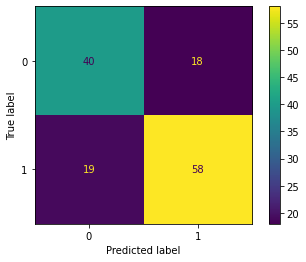

In [38]:
#confusion matrix
plot_confusion_matrix(model, X_test, y_test, values_format = 'd')

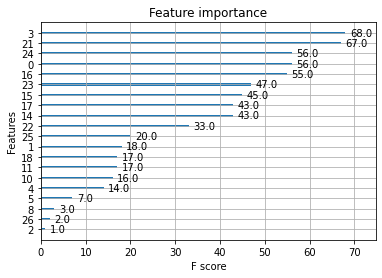

In [291]:
# plot feature importance
plot_importance(model)
pyplot.show()

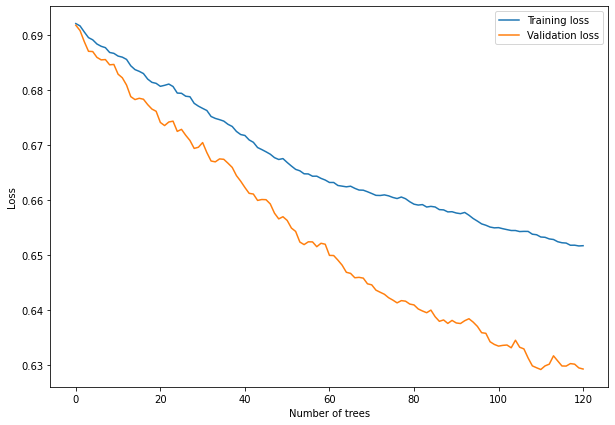

In [39]:
#plot training and validation loss
results = model.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["logloss"], label="Training loss")
plt.plot(results["validation_1"]["logloss"], label="Validation loss")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

In [40]:
#classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.68      0.69      0.68        58
           1       0.76      0.75      0.76        77

    accuracy                           0.73       135
   macro avg       0.72      0.72      0.72       135
weighted avg       0.73      0.73      0.73       135



In [41]:
sexe_anxiete = pd.crosstab(data.anxiete, data.sexe, margins=True)
sexe_anxiete

sexe,Femme,Homme,All
anxiete,,,
existence d'anxiété,268,50,318
état normal,219,135,354
All,487,185,672


In [42]:
#chi2 test (sexe)
sexe_anxiete = pd.crosstab(data.anxiete, data.sexe, margins=True)
obs_sexe = np.array([sexe_anxiete.iloc[0][0:-1].values,
                sexe_anxiete.iloc[1][0:-1].values])
stats.chi2_contingency(obs_sexe)[0:3]

(41.06081562309251, 1.4756531097617472e-10, 1)

In [43]:
etab_anxiete = pd.crosstab(data.etablissement, data.anxiete, margins=True)
etab_anxiete

anxiete,existence d'anxiété,état normal,All
etablissement,,,
CLASSES PREPARATOIRES AUX GRANDES ECOLES,15,10,25
ECOLE D'INGENIEUR,113,171,284
ECOLE DE COMMERCE ET DE GESTION,35,23,58
ECOLE SUPERIEURE DE TECHNOLOGIE,23,21,44
ETABLISSEMENT DE PROFESSIONS INFIRMIERES,1,7,8
ETABLISSEMENT DES METIERS D'EDUCATION,3,2,5
FACULTE DE MEDECINE,15,28,43
FACULTE DES LETTRES ET DES SCIENCES HUMAINES,13,12,25
FACULTE DES SCIENCES,38,35,73


In [356]:
#chi2 test (etablissement)
obs_etab = np.array([etab_anxiete.iloc[0][0:-1].values,
                etab_anxiete.iloc[1][0:-1].values,
                etab_anxiete.iloc[2][0:-1].values,
                    etab_anxiete.iloc[3][0:-1].values,
                    etab_anxiete.iloc[4][0:-1].values,
                    etab_anxiete.iloc[5][0:-1].values,
                    etab_anxiete.iloc[6][0:-1].values,
                    etab_anxiete.iloc[7][0:-1].values,
                    etab_anxiete.iloc[8][0:-1].values,
                    etab_anxiete.iloc[9][0:-1].values,
                    etab_anxiete.iloc[10][0:-1].values,
                    etab_anxiete.iloc[11][0:-1].values])
stats.chi2_contingency(obs_etab)[0:3]

(25.708299397234367, 0.007170369494020495, 11)

In [303]:
age_anxiete = pd.crosstab(data.anxiete, data.age, margins=True)
age_anxiete

age,18-20,20-22,22-24,Supérieur à 24,All
anxiete,,,,,
existence d'anxiété,132,133,43,10,318
état normal,119,163,51,21,354
All,251,296,94,31,672


In [349]:
#chi2 test (age)
obs_age = np.array([age_anxiete.iloc[0][0:-1].values,
                age_anxiete.iloc[1][0:-1].values,])
stats.chi2_contingency(obs_age)[0:3]

(6.387684758611529, 0.0941987500169464, 3)

In [305]:
annee_anxiete = pd.crosstab(data.anxiete, data.annee, margins=True)
annee_anxiete

annee,1ère années,2ème année,3ème année,4ème année,5ème année,6ème année où 7ème année (pour les étudiants en médecine),Doctorants,All
anxiete,,,,,,,,
existence d'anxiété,95,58,83,48,24,1,9,318
état normal,62,73,84,80,41,4,10,354
All,157,131,167,128,65,5,19,672


In [350]:
#chi2 test (annee)
obs_annee = np.array([annee_anxiete.iloc[0][0:-1].values,
                annee_anxiete.iloc[1][0:-1].values,])
stats.chi2_contingency(obs_annee)[0:3]

(21.09059285426478, 0.0017671041382254678, 6)

In [353]:
resid_anxiete = pd.crosstab(data.anxiete, data.residence, margins=True)
resid_anxiete

residence,Avec famille,Seul(e),All
anxiete,,,
existence d'anxiété,153,165,318
état normal,176,178,354
All,329,343,672


In [354]:
#chi2 test residence
obs_resid = np.array([resid_anxiete.iloc[0][0:-1].values,
                resid_anxiete.iloc[1][0:-1].values])
stats.chi2_contingency(obs_resid)[0:3]

(0.11430982043832373, 0.7352898248452383, 1)